In [1]:
import numpy as np

import torch
from torch import nn
from torchinfo import summary

from matplotlib import pyplot as plt

from tqdm.notebook import tqdm

from datasets import get_dataset
from models import NCSN
from losses import NCSNLoss, GaussianPerturbation
from train import Trainer
from samplers import AnnealedLangevinDynamics

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

mps


In [3]:
sigma0 = 0.01
r = 5 / 3
L = 10

sigmas = torch.as_tensor([sigma0 * r ** (L - i - 1) for i in range(L)], device=device)

print(sigmas)

tensor([0.9923, 0.5954, 0.3572, 0.2143, 0.1286, 0.0772, 0.0463, 0.0278, 0.0167,
        0.0100], device='mps:0')


In [4]:
B = 64

train_loader, test_loader = get_dataset("mnist", batch_size=B, num_workers=4, pin_memory=False)
shape = (28, 28, 1)

In [5]:
model = NCSN(shape, L, filters=64)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print(summary(model, [(1, *shape[::-1]), (1,)], dtypes=[torch.float, torch.long]))

Layer (type:depth-idx)                                                           Output Shape              Param #
NCSN                                                                             [1, 1, 28, 28]            --
├─Conv2d: 1-1                                                                    [1, 64, 28, 28]           640
├─ConditionalSequential: 1-2                                                     [1, 128, 14, 14]          2,075,584
│    └─ConditionalResidualBlock: 2-1                                             [1, 64, 28, 28]           75,776
│    │    └─ConditionalInstanceNorm2dPlus: 3-1                                   [1, 64, 28, 28]           1,920
├─ConditionalSequential: 1-122                                                   --                        (recursive)
│    └─ELU: 2-2                                                                  [1, 64, 28, 28]           --
├─ConditionalSequential: 1-34                                                    --        

In [6]:
perturbation = GaussianPerturbation()
loss_fn = NCSNLoss(perturbation, sigmas, coeff_func=lambda s: s**2, K=1)

In [7]:
trainer = Trainer(train_loader, model, device)

trainer.train(loss_fn, optimizer, verbose=True, epochs=120)

  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 1 (Loss: 0.4022)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 2 (Loss: 0.3187)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 3 (Loss: 0.3047)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 4 (Loss: 0.2500)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 5 (Loss: 0.2736)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 6 (Loss: 0.2322)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 7 (Loss: 0.1858)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 8 (Loss: 0.2044)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 9 (Loss: 0.1888)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 10 (Loss: 0.1746)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 11 (Loss: 0.1677)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 12 (Loss: 0.1250)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 13 (Loss: 0.1757)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 14 (Loss: 0.1586)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 15 (Loss: 0.1695)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 16 (Loss: 0.1433)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 17 (Loss: 0.1280)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 18 (Loss: 0.1306)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 19 (Loss: 0.1299)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 20 (Loss: 0.1143)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 21 (Loss: 0.1507)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 22 (Loss: 0.1176)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 23 (Loss: 0.1144)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 24 (Loss: 0.1218)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 25 (Loss: 0.1019)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 26 (Loss: 0.1241)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 27 (Loss: 0.1648)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 28 (Loss: 0.1529)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 29 (Loss: 0.0856)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 30 (Loss: 0.0739)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 31 (Loss: 0.0828)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 32 (Loss: 0.1076)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 33 (Loss: 0.0983)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 34 (Loss: 0.0984)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 35 (Loss: 0.0859)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 36 (Loss: 0.0967)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 37 (Loss: 0.1004)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 38 (Loss: 0.0782)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 39 (Loss: 0.0964)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 40 (Loss: 0.0797)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 41 (Loss: 0.0725)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 42 (Loss: 0.0733)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 43 (Loss: 0.0909)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 44 (Loss: 0.0894)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 45 (Loss: 0.0969)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 46 (Loss: 0.0682)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 47 (Loss: 0.0700)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 48 (Loss: 0.0761)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 49 (Loss: 0.0772)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 50 (Loss: 0.0793)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 51 (Loss: 0.0687)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 52 (Loss: 0.0709)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 53 (Loss: 0.0643)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 54 (Loss: 0.0928)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 55 (Loss: 0.0856)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 56 (Loss: 0.0846)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 57 (Loss: 0.0635)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 58 (Loss: 0.0722)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 59 (Loss: 0.0863)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 60 (Loss: 0.0766)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 61 (Loss: 0.0700)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 62 (Loss: 0.0741)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 63 (Loss: 0.0639)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 64 (Loss: 0.0702)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 65 (Loss: 0.0702)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 66 (Loss: 0.0691)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 67 (Loss: 0.0585)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 68 (Loss: 0.0605)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 69 (Loss: 0.0864)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 70 (Loss: 0.0690)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 71 (Loss: 0.0665)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 72 (Loss: 0.0680)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 73 (Loss: 0.0680)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 74 (Loss: 0.0543)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 75 (Loss: 0.0672)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 76 (Loss: 0.0671)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 77 (Loss: 0.0678)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 78 (Loss: 0.0647)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 79 (Loss: 0.0607)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 80 (Loss: 0.0702)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 81 (Loss: 0.0588)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 82 (Loss: 0.0606)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 83 (Loss: 0.0683)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 84 (Loss: 0.0603)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 85 (Loss: 0.0655)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 86 (Loss: 0.0619)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 87 (Loss: 0.0603)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 88 (Loss: 0.0517)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 89 (Loss: 0.0629)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 90 (Loss: 0.0556)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 91 (Loss: 0.0664)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 92 (Loss: 0.0610)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 93 (Loss: 0.0594)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 94 (Loss: 0.0577)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 95 (Loss: 0.0633)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 96 (Loss: 0.0605)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 97 (Loss: 0.0751)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 98 (Loss: 0.0745)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 99 (Loss: 0.0592)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 100 (Loss: 0.0609)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 101 (Loss: 0.0510)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 102 (Loss: 0.0545)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 103 (Loss: 0.0579)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 104 (Loss: 0.0562)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 105 (Loss: 0.0582)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 106 (Loss: 0.0545)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 107 (Loss: 0.0580)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 108 (Loss: 0.0517)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 109 (Loss: 0.0532)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 110 (Loss: 0.0551)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 111 (Loss: 0.0668)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 112 (Loss: 0.0556)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 113 (Loss: 0.0742)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 114 (Loss: 0.0780)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 115 (Loss: 0.0572)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 116 (Loss: 0.0610)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 117 (Loss: 0.0597)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 118 (Loss: 0.0529)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 119 (Loss: 0.0543)


  0%|          | 0/93 [00:00<?, ?batch/s]

Epoch 120 (Loss: 0.0544)


tensor([0.4022, 0.3187, 0.3047, 0.2500, 0.2736, 0.2322, 0.1858, 0.2044, 0.1888,
        0.1746, 0.1677, 0.1250, 0.1757, 0.1586, 0.1695, 0.1433, 0.1280, 0.1306,
        0.1299, 0.1143, 0.1507, 0.1176, 0.1144, 0.1218, 0.1019, 0.1241, 0.1648,
        0.1529, 0.0856, 0.0739, 0.0828, 0.1076, 0.0983, 0.0984, 0.0859, 0.0967,
        0.1004, 0.0782, 0.0964, 0.0797, 0.0725, 0.0733, 0.0909, 0.0894, 0.0969,
        0.0682, 0.0700, 0.0761, 0.0772, 0.0793, 0.0687, 0.0709, 0.0643, 0.0928,
        0.0856, 0.0846, 0.0635, 0.0722, 0.0863, 0.0766, 0.0700, 0.0741, 0.0639,
        0.0702, 0.0702, 0.0691, 0.0585, 0.0605, 0.0864, 0.0690, 0.0665, 0.0680,
        0.0680, 0.0543, 0.0672, 0.0671, 0.0678, 0.0647, 0.0607, 0.0702, 0.0588,
        0.0606, 0.0683, 0.0603, 0.0655, 0.0619, 0.0603, 0.0517, 0.0629, 0.0556,
        0.0664, 0.0610, 0.0594, 0.0577, 0.0633, 0.0605, 0.0751, 0.0745, 0.0592,
        0.0609, 0.0510, 0.0545, 0.0579, 0.0562, 0.0582, 0.0545, 0.0580, 0.0517,
        0.0532, 0.0551, 0.0668, 0.0556, 

In [10]:
sampler = AnnealedLangevinDynamics(model, sigmas, device)

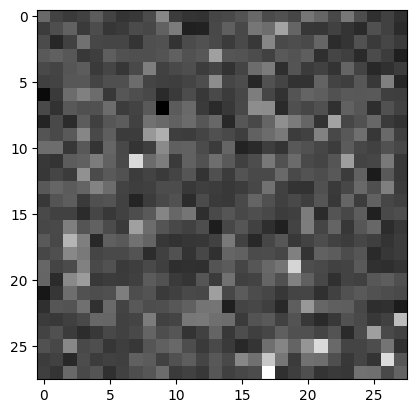

In [11]:
img = sampler.sample(shape[::-1], epsilon=2e-5).permute(2, 1, 0).cpu().numpy()
plt.imshow(img, cmap="gray")
plt.show()